## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)
#study_results = study_results[study_results["Timepoint"] == 45]

# Combine the data into a single dataset
#mouse_metadata.drop_duplicates("Mouse ID", inplace=True)
#study_results.drop_duplicates("Mouse ID", inplace=True)
df = pd.merge(mouse_metadata,study_results, on=["Mouse ID","Mouse ID"], how='inner')
df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice in the DataFrame.
len(df["Mouse ID"].unique())

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
timepoints = dict()
count = 249
for x in df["Timepoint"].unique():
    if len(df.loc[df.Timepoint == x,"Mouse ID"]) >= count:
        tmp = df.loc[df.Timepoint == x,"Mouse ID"].value_counts()
        print(tmp.loc[tmp != 1])
    else:
        count = len(df.loc[df.Timepoint == x,"Mouse ID"])
    print(x,count)
    

g989    2
Name: Mouse ID, dtype: int64
0 249
5 238
10 223
15 207
20 195
25 183
30 171
35 154
40 142
45 130


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 


In [4]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
df.drop_duplicates(subset=['Mouse ID','Timepoint'],inplace=True)
df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.


## Summary Statistics

In [22]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
pd.DataFrame({ 'mean': df.groupby('Drug Regimen').mean()["Tumor Volume (mm3)"],
  'median': df.groupby('Drug Regimen').median()["Tumor Volume (mm3)"],
  'variance': df.groupby('Drug Regimen').var()["Tumor Volume (mm3)"],
  'standard deviation': df.groupby('Drug Regimen').std()["Tumor Volume (mm3)"],
  'SEM': df.groupby('Drug Regimen').sem()["Tumor Volume (mm3)"]
})


# This method is the most straighforward, creating multiple series and putting them all together at the end.

,mean,median,variance,standard deviation,SME
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

## Bar Plots

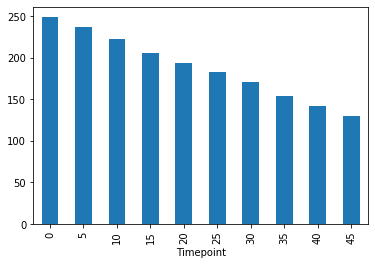

In [9]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas. 
df["Mouse ID"].groupby(df.Timepoint).count().plot(kind='bar')

<BarContainer object of 10 artists>

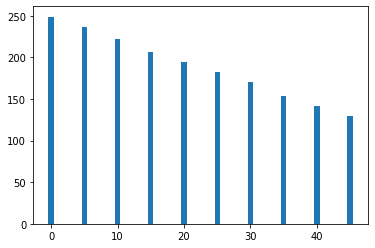

In [10]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.
plt.bar(df.Timepoint.unique(), df["Mouse ID"].groupby(df.Timepoint).count())

## Pie Plots

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

## Quartiles, Outliers and Boxplots

In [45]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 
iqr = {  1:df[["Tumor Volume (mm3)","Drug Regimen"]].groupby('Drug Regimen').quantile(.25),
         2:df[["Tumor Volume (mm3)","Drug Regimen"]].groupby('Drug Regimen').quantile(.50),
         3:df[["Tumor Volume (mm3)","Drug Regimen"]].groupby('Drug Regimen').quantile(.75)}


{1:               Tumor Volume (mm3)
 Drug Regimen                    
 Capomulin              37.685933
 Ceftamin               47.208427
 Infubinol              47.312353
 Ketapril               48.232987
 Naftisol               47.285874
 Placebo                47.459053
 Propriva               47.046068
 Ramicane               36.674635
 Stelasyn               48.047139
 Zoniferol              47.337876,
 2:               Tumor Volume (mm3)
 Drug Regimen                    
 Capomulin              41.557809
 Ceftamin               51.776157
 Infubinol              51.820584
 Ketapril               53.698743
 Naftisol               52.509285
 Placebo                52.288934
 Propriva               50.909965
 Ramicane               40.673236
 Stelasyn               52.431737
 Zoniferol              51.818479,
 3:               Tumor Volume (mm3)
 Drug Regimen                    
 Capomulin              45.000000
 Ceftamin               56.801438
 Infubinol              57.314444
 Ke

TypeError: can only concatenate str (not "float") to str

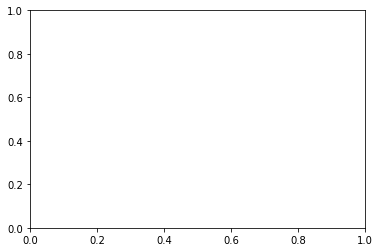

In [49]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

fig1, ax = plt.subplots()
ax.boxplot(df[['Drug Regimen','Tumor Volume (mm3)']])
plt.show()

## Line and Scatter Plots

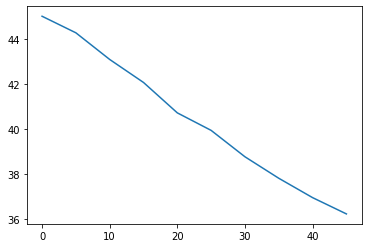

In [15]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
plt.plot(df.loc[df["Drug Regimen"] == "Capomulin","Timepoint"].unique(),df.loc[df["Drug Regimen"] == "Capomulin","Tumor Volume (mm3)"].groupby(df.Timepoint).mean())

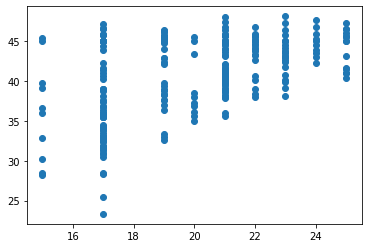

In [16]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
plt.scatter(df.loc[df["Drug Regimen"] == "Capomulin","Weight (g)"],df.loc[df["Drug Regimen"] == "Capomulin","Tumor Volume (mm3)"])


## Correlation and Regression

In [17]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
st.linregress(df.loc[df["Drug Regimen"] == "Capomulin","Weight (g)"],df.loc[df["Drug Regimen"] == "Capomulin","Tumor Volume (mm3)"])

LinregressResult(slope=0.9609669432428346, intercept=21.489827213299584, rvalue=0.5256995552077166, pvalue=9.605446629502282e-18, stderr=0.10298279892023657)